In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 乱数を固定
rand = np.random.RandomState(seed=20)

# データを生成
idx = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')
x = np.arange(len(idx))
y = 5 \
    + x ** 2 \
    + np.sin(x/4) * 100 \
    + rand.randn(len(x)) * 100000 \
    + rand.gamma(0.01, 1000000, len(x))

In [2]:
df = pd.DataFrame({'y':y, 'x1':x})
df['x2'] = df['x1']*100 +1000
df['x3'] = df['x1']*200 +2000
print(df.head())
print(df.tail())
print(df.mean())

               y  x1    x2    x3
0   88394.311262   0  1000  2000
1   19617.242600   1  1100  2200
2   35810.594142   2  1200  2400
3 -233911.640472   3  1300  2600
4 -108378.111633   4  1400  2800
                 y   x1     x2     x3
360   66424.262836  360  37000  74000
361   94448.866814  361  37100  74200
362  194846.790437  362  37200  74400
363  -29134.090927  363  37300  74600
364  271277.862566  364  37400  74800
y     57058.562849
x1      182.000000
x2    19200.000000
x3    38400.000000
dtype: float64


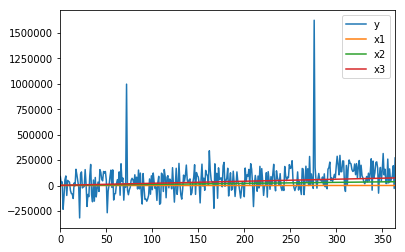

In [3]:
df.plot()

# ヒストグラム

Text(0.5, 1.0, 'Remove Anomaly Datas')

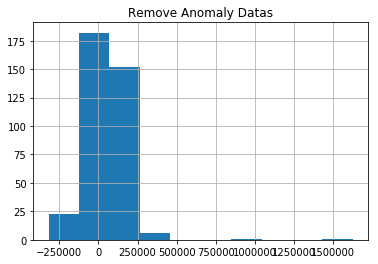

In [4]:
x = df["y"]
x.hist()
plt.title("Remove Anomaly Datas")


# 一次元の異常検知　その１

a_th
3.841458820694124


,y,x1,x2,x3
3,-2.339116e+05,3,1300,2600
21,-3.186102e+05,21,3100,6200
51,-2.678123e+05,51,6100,12200
72,9.968751e+05,72,8200,16400
276,1.625175e+06,276,28600,57200


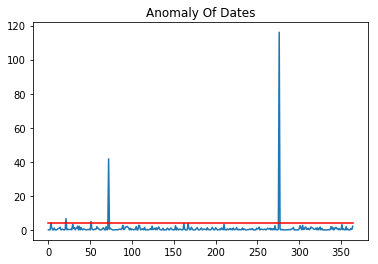

In [5]:
import scipy.stats as stats

# 平均
mu = np.mean(y)

# 異常度
N=len(y)
sig =(np.sum( (y-mu)**2 ))/N
sig = np.sqrt(sig)
a = ( (y- mu)/sig )**2

# カイ二乗分布による5%水準の閾値
a_th =stats.chi2.ppf(q=0.95, df=1)
print('a_th')
print(a_th)
 
# 結果の描画
plt.plot(a)
plt.plot(a_th*np.ones(len(a)), c="r")
plt.title("Anomaly Of Dates")

# 異常データ出力
b = df['y']
anomaly = b[a>a_th].index
df.loc[anomaly]

# 1次元の異常検知 　その２

5.023886187314888


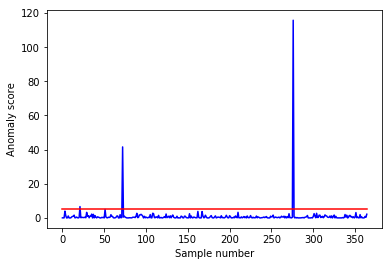

,y,x1,x2,x3
21,-3.186102e+05,21,3100,6200
72,9.968751e+05,72,8200,16400
276,1.625175e+06,276,28600,57200


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from statistics import mean, variance
from scipy import stats

# 標本平均
mean = mean(df['y'])

# 標本分散
variance = variance(df['y'])

# 異常度
anomaly_scores = []
for y_item in df['y']:
    anomaly_score = (y_item - mean)**2 / variance
    anomaly_scores.append(anomaly_score)

# カイ二乗分布による5%水準の閾値
threshold = stats.chi2.interval(0.95, 1)[1]
print(threshold)
threshold_list = [threshold] * len(anomaly_scores)

# 結果の描画
plt.plot(anomaly_scores, color = "b")
plt.plot(threshold_list,c="r")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

# 異常データ出力
b = df['y']
anomaly = b[anomaly_scores>threshold].index
df.loc[anomaly]


# ２次元の異常検知 (要確認)

In [7]:
# 参考： https://masamunetogetoge.com/hotelling-t2

mu
y     57058.562849
x1      182.000000
x2    19200.000000
x3    38400.000000
dtype: float64
Sig
[[2.11821440e+10 4.53856938e+06 4.53856938e+08 9.07713877e+08]
 [4.53856938e+06 1.11020000e+04 1.11020000e+06 2.22040000e+06]
 [4.53856938e+08 1.11020000e+06 1.11020000e+08 2.22040000e+08]
 [9.07713877e+08 2.22040000e+06 2.22040000e+08 4.44080000e+08]]
a_th
9.487729036781154


Text(0, 0.5, 'Anomaly')

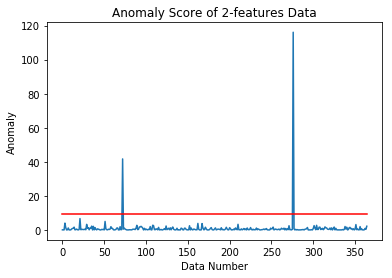

In [8]:
import scipy.stats as stats

# 平均
mu = np.mean(df)
print('mu')
print(mu)

# aを求める
N=len(df)
M=len(df.columns)
Sig = np.dot((df-mu).T,(df-mu) )/N
print('Sig')
print(Sig)

# 閾値を求める
a_th =stats.chi2.ppf(q=0.95, df=M)
print('a_th')
print(a_th)

# グラフ化
plt.plot(a)
plt.plot(a_th*np.ones(len(df)),c="r")
plt.title("Anomaly Score of 2-features Data")
plt.xlabel("Data Number")
plt.ylabel("Anomaly")
